In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Loading the train data
df_train = pd.read_csv('Train.csv')
# Looking top 10 rows
df_train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [6]:
# Looking the bigger picture
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
# Checking the number of missing values in each column
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:

# Loading the train data
df_test = pd.read_csv('Test.csv')

# Looking top 10 rows
df_test.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


In [9]:
# Looking the bigger picture
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [10]:
# Checking the number of missing values in each column
df_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [11]:
# Removing all those rows that have 3 or more missing values
df_train = df_train.loc[df_train.isnull().sum(axis=1)<3]

In [12]:
# Looking random 10 rows of the data
df_train.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7190,465673,Female,No,27,NaN,Marketing,8.0,Low,4.0,Cat_4,D
3514,462893,Female,Yes,52,No,Artist,1.0,Average,3.0,Cat_4,C
1581,458997,Male,Yes,61,Yes,Artist,1.0,Average,2.0,Cat_6,B
7484,466232,Male,Yes,59,No,Executive,0.0,High,3.0,Cat_6,C
510,460685,Male,No,51,NaN,Artist,6.0,Low,4.0,Cat_4,B
2959,464502,Male,Yes,35,Yes,Healthcare,6.0,Average,2.0,Cat_6,A
255,462318,Female,Yes,82,No,Lawyer,0.0,Average,2.0,Cat_6,A
832,462027,Male,No,39,No,Engineer,1.0,Low,1.0,Cat_6,A
3735,461707,Female,Yes,45,Yes,Artist,1.0,Average,4.0,Cat_6,C
5393,460470,Male,No,36,No,Healthcare,NaN,Low,4.0,Cat_4,B


In [13]:
# Removing all those rows that have 3 or more missing values
df_test = df_test.loc[df_test.isnull().sum(axis=1)<3]

In [14]:
# Looking random 10 rows of the data
df_test.sample(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
1000,462323,Female,Yes,71,Yes,Doctor,1.0,Average,2.0,Cat_6
874,461927,Male,No,32,No,Healthcare,1.0,Low,4.0,Cat_2
2115,466213,Male,No,20,No,Healthcare,2.0,Low,5.0,Cat_6
1800,465124,Female,Yes,27,Yes,Healthcare,6.0,Average,2.0,Cat_6
737,461423,Male,No,32,Yes,Artist,1.0,Low,3.0,Cat_4
1677,464704,Male,Yes,41,Yes,Healthcare,0.0,Average,4.0,Cat_4
141,459418,Male,Yes,69,No,Executive,0.0,High,2.0,Cat_6
2466,467438,Male,No,27,No,Entertainment,5.0,Low,3.0,Cat_6
63,459182,Female,Yes,46,Yes,Artist,1.0,Average,2.0,Cat_6
2128,466264,Male,Yes,32,Yes,NaN,1.0,Low,2.0,Cat_3


In [15]:
print('The catagory count\n',df_train.Var_1.value_counts())

The catagory count
 Cat_6    5232
Cat_4    1084
Cat_3     820
Cat_2     422
Cat_7     201
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [16]:
# Checking for null values
df_train.Var_1.isnull().sum()

72

In [17]:
# Filling the missing values w.r.t other attributes underlying pattern 
df_train.loc[ (pd.isnull(df_train['Var_1'])) & (df_train['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
df_train.loc[ (pd.isnull(df_train['Var_1'])) & (df_train['Graduated'] == 'No'),"Var_1"] = 'Cat_4'
df_train.loc[ (pd.isnull(df_train["Var_1"])) & ((df_train['Profession'] == 'Lawyer') | (df_train['Profession'] == 'Artist')),"Var_1"] = 'Cat_6'
df_train.loc[ (pd.isnull(df_train["Var_1"])) & (df_train['Age'] > 40),"Var_1"] = 'Cat_6'

In [18]:
# Checking for null values
df_test.Var_1.isnull().sum()

29

In [19]:
numerical_columns_train=['ID','Age','Work_Experience','Family_Size' ]
categorical_columns_train=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']

In [20]:
numerical_columns_test=['ID','Age','Work_Experience','Family_Size' ]
categorical_columns_test=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']

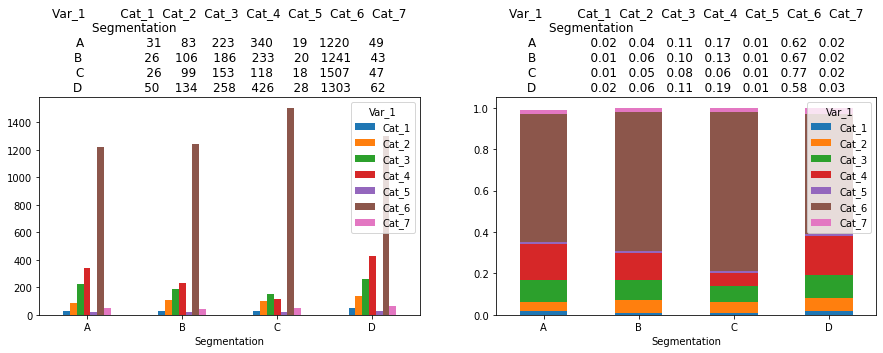

In [21]:
# Counting Var_1 in each segment
ax1 = df_train.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = df_train.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()



In [22]:
# Checking the count of missing values
df_train.Gender.isnull().sum()

0

In [23]:
# Checking the count of missing values
df_test.Gender.isnull().sum()

0

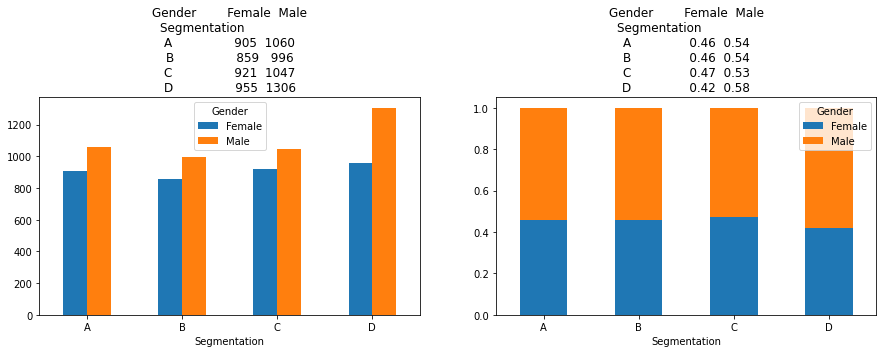

In [24]:
# Counting male-female in each segment
ax1 = df_train.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df_train.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [25]:
print('The count grouped by marital status\n',df_train.Ever_Married.value_counts())

The count grouped by marital status
 Yes    4635
No     3280
Name: Ever_Married, dtype: int64


In [26]:

# Checking the count of missing values
df_train.Gender.isnull().sum()


0

In [27]:


# Checking the count of missing values
df_test.Gender.isnull().sum()



0

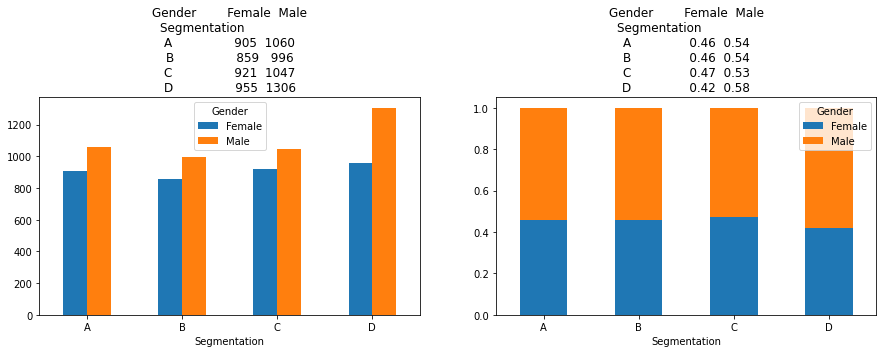

In [28]:


# Counting male-female in each segment
ax1 = df_train.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df_train.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()



In [29]:
print('The count grouped by marital status\n',df_train.Ever_Married.value_counts())


The count grouped by marital status
 Yes    4635
No     3280
Name: Ever_Married, dtype: int64


In [30]:

# Checking the count of missing values
df_train.Ever_Married.isnull().sum()



134

In [31]:

# Filling the missing values w.r.t other attributes underlying pattern
df_train.loc[ (pd.isnull(df_train["Ever_Married"])) & ((df_train['Spending_Score'] == 'Average') | (df_train['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Ever_Married"])) & (df_train['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
df_train.loc[ (pd.isnull(df_train["Ever_Married"])) & (df_train['Age'] > 40),"Ever_Married"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Ever_Married"])) & (df_train['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'


In [32]:


# Checking the count of missing values
df_test.Ever_Married.isnull().sum()


48

In [33]:

# Filling the missing values w.r.t other attributes underlying pattern
df_test.loc[ (pd.isnull(df_test["Ever_Married"])) & ((df_test['Spending_Score'] == 'Average') | (df_test['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Ever_Married"])) & (df_test['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
df_test.loc[ (pd.isnull(df_test["Ever_Married"])) & (df_test['Age'] > 40),"Ever_Married"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Ever_Married"])) & (df_test['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'



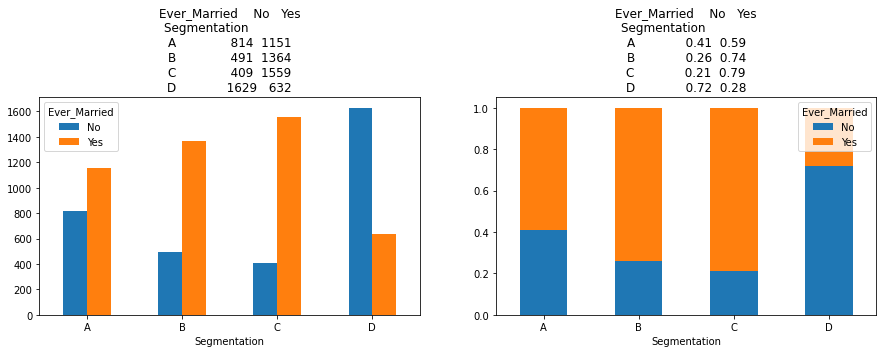

In [34]:

# Counting married and non-married in each segment
ax1 = df_train.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

# Percentage of married and non-married in each segment
ax2 = df_train.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [35]:
df_train.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8049.000000
mean       43.458442
std        16.704328
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [36]:


# Checking the count of missing values
df_train.Age.isnull().sum()


0

In [37]:

# Checking the count of missing values
df_test.Age.isnull().sum()



0

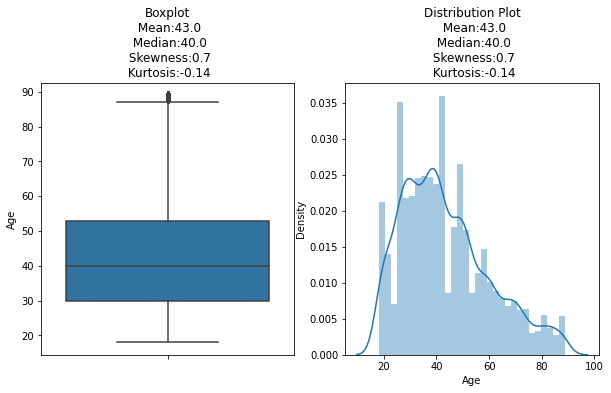

In [38]:


# Looking the distribution of column Age
plt.figure(figsize=(10,5))

skewness = round(df_train.Age.skew(),2)
kurtosis = round(df_train.Age.kurtosis(),2)
mean = round(np.mean(df_train.Age),0)
median = np.median(df_train.Age)

plt.subplot(1,2,1)
sns.boxplot(y=df_train.Age)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df_train.Age)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()


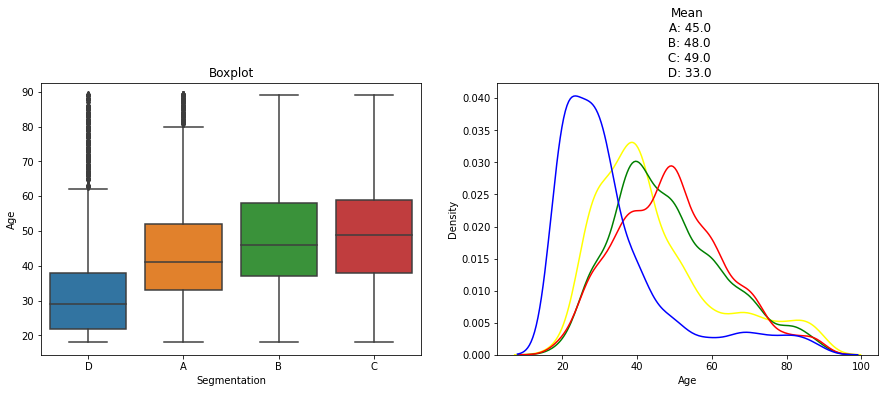

In [39]:

# Looking the distribution of column Age w.r.t to each segment
a = df_train[df_train.Segmentation =='A']["Age"]
b = df_train[df_train.Segmentation =='B']["Age"]
c = df_train[df_train.Segmentation =='C']["Age"]
d = df_train[df_train.Segmentation =='D']["Age"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df_train, x = "Segmentation", y="Age")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A', color = 'yellow')
sns.kdeplot(b,shade= False, label = 'B', color = 'green')
sns.kdeplot(c,shade= False, label = 'C', color = 'red')
sns.kdeplot(d,shade= False, label = 'D', color = 'blue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()



In [40]:


# Converting the datatype from float to int
df_train['Age'] = df_train['Age'].astype(int)



In [41]:

df_train.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])



count    8049.000000
mean       43.458442
std        16.704328
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [42]:
# Divide people in the 4 age group
df_train['Age_Bin'] = pd.cut(df_train.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])


In [43]:

# Divide people in the 4 age group
df_test['Age_Bin'] = pd.cut(df_test.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])



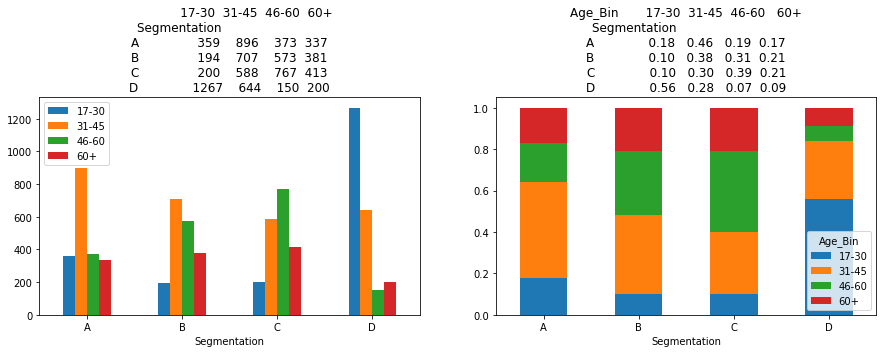

In [44]:


# Counting different age group in each segment
ax1 = df_train.groupby(["Segmentation"])["Age_Bin"].value_counts().unstack().round(3)

# Percentage of age bins in each segment
ax2 = df_train.pivot_table(columns='Age_Bin',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [45]:
print('Count of each graduate and non-graduate\n',df_train.Graduated.value_counts())


Count of each graduate and non-graduate
 Yes    4965
No     3012
Name: Graduated, dtype: int64


In [46]:

# Checking the count of missing values
df_train.Graduated.isnull().sum()


72

In [47]:

# Filling the missing values w.r.t other attributes underlying pattern
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Profession'] == 'Artist'),"Graduated"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Age'] > 49),"Graduated"] = 'Yes'
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Var_1'] == 'Cat_4'),"Graduated"] = 'No'
df_train.loc[ (pd.isnull(df_train["Graduated"])) & (df_train['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

# Replacing remaining NaN with previous values
df_train['Graduated'] = df_train['Graduated'].fillna(method='pad')


In [48]:
# Checking the count of missing values
df_test.Graduated.isnull().sum()


23

In [49]:
# Filling the missing values w.r.t other attributes underlying pattern
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Profession'] == 'Artist'),"Graduated"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Age'] > 49),"Graduated"] = 'Yes'
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Var_1'] == 'Cat_4'),"Graduated"] = 'No'
df_test.loc[ (pd.isnull(df_test["Graduated"])) & (df_test['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

# Replacing remaining NaN with previous values
df_test['Graduated'] = df_test['Graduated'].fillna(method='pad')


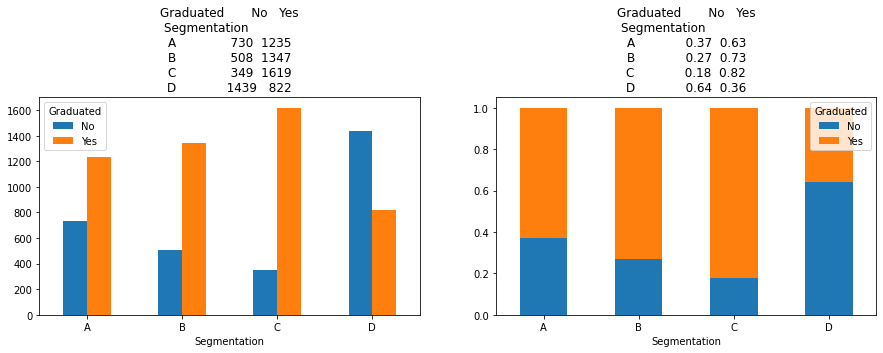

In [50]:
# Counting graduate and non-graduate in each segment
ax1 = df_train.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df_train.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()


In [51]:
print('The count grouped by profession\n',df_train.Profession.value_counts())

The count grouped by profession
 Artist           2515
Healthcare       1331
Entertainment     949
Engineer          699
Doctor            688
Lawyer            619
Executive         598
Marketing         291
Homemaker         246
Name: Profession, dtype: int64


In [52]:
# Checking the count of missing values
df_train.Profession.isnull().sum()

113

In [53]:
# Filling the missing values w.r.t other attributes underlying pattern
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Age'] > 70),"Profession"] = 'Lawyer'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Family_Size'] < 3),"Profession"] = 'Lawyer'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df_train.loc[ (pd.isnull(df_train["Profession"])) & (df_train['Spending_Score'] == 'High'),"Profession"] = 'Executives'


In [54]:
# Checking the count of missing values
df_test.Profession.isnull().sum()

35

In [55]:
# Filling the missing values w.r.t other attributes underlying pattern
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Age'] > 70),"Profession"] = 'Lawyer'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Family_Size'] < 3),"Profession"] = 'Lawyer'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df_test.loc[ (pd.isnull(df_test["Profession"])) & (df_test['Spending_Score'] == 'High'),"Profession"] = 'Executives'


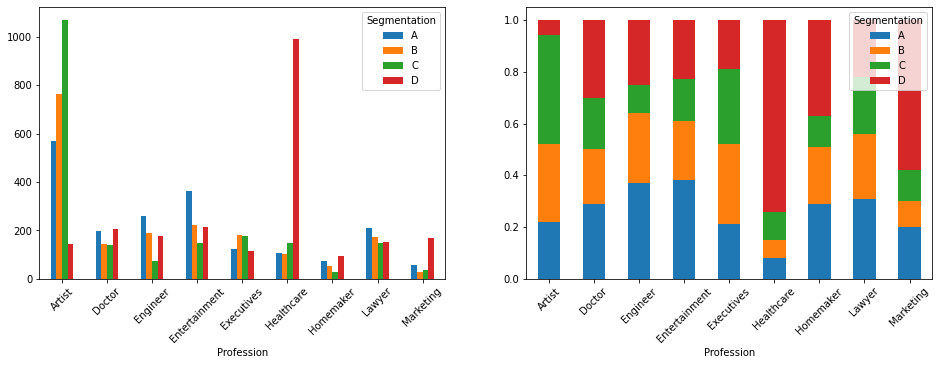

In [56]:
# Count of segments in each profession
ax1 = df_train.groupby(["Profession"])["Segmentation"].value_counts().unstack().round(3)

# Percentage of segments in each profession
ax2 = df_train.pivot_table(columns='Segmentation',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (16,5))
label = ['Artist','Doctor','Engineer','Entertainment','Executives','Healthcare','Homemaker','Lawyer','Marketing']
ax[0].set_xticklabels(labels = label,rotation = 45)

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (16,5))
ax[1].set_xticklabels(labels = label,rotation = 45)

plt.show()

In [57]:
df_train.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    7236.000000
mean        2.642758
std         3.407044
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
90%         8.000000
95%         9.000000
99%        13.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [58]:

# Checking the count of missing values
df_train.Work_Experience.isnull().sum()

813

In [59]:
# Replacing NaN with previous values
df_train['Work_Experience'] = df_train['Work_Experience'].fillna(method='pad')


In [60]:
# Checking the count of missing values
df_test.Work_Experience.isnull().sum()


264

In [61]:
# Replacing NaN with previous values
df_test['Work_Experience'] = df_test['Work_Experience'].fillna(method='pad')


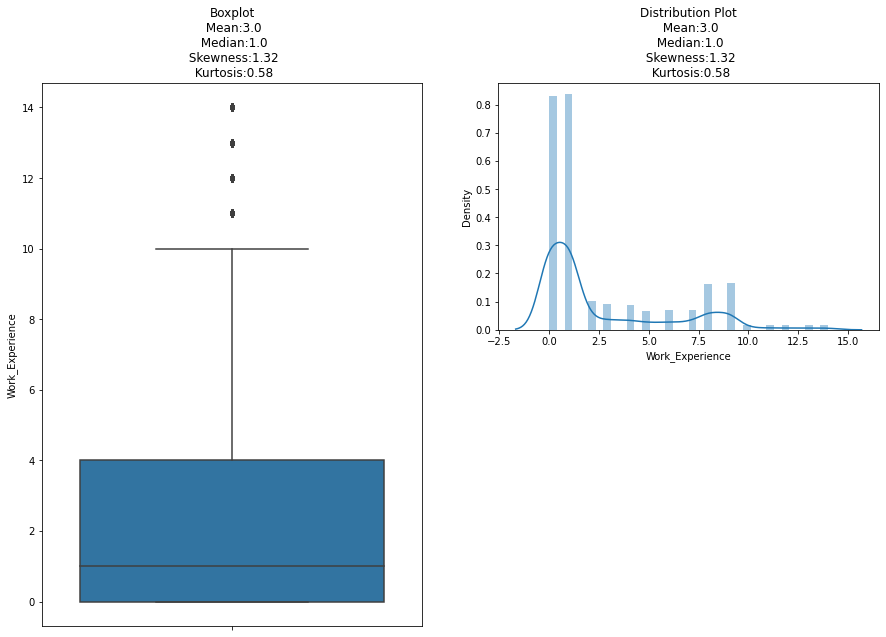

In [62]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df_train.Work_Experience.skew(),2)
kurtosis = round(df_train.Work_Experience.kurtosis(),2)
mean = round(np.mean(df_train.Work_Experience),0)
median = np.median(df_train.Work_Experience)

plt.subplot(1,2,1)
sns.boxplot(y=df_train.Work_Experience)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df_train.Work_Experience)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

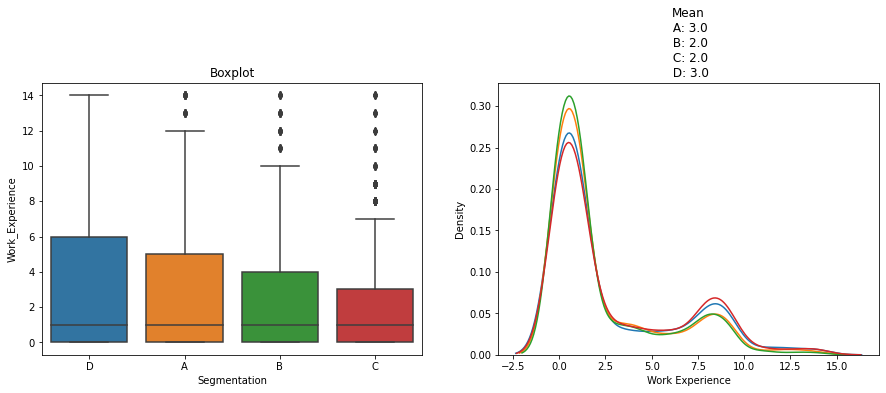

In [63]:
#Looking the distribution of column Work_Experience w.r.t to each segment
a = df_train[df_train.Segmentation =='A']["Work_Experience"]
b = df_train[df_train.Segmentation =='B']["Work_Experience"]
c = df_train[df_train.Segmentation =='C']["Work_Experience"]
d = df_train[df_train.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df_train, x = "Segmentation", y="Work_Experience")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [64]:

# Dividing the people into 3 category of work experience 
df_train['Work_Exp_Category'] = pd.cut(df_train.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])


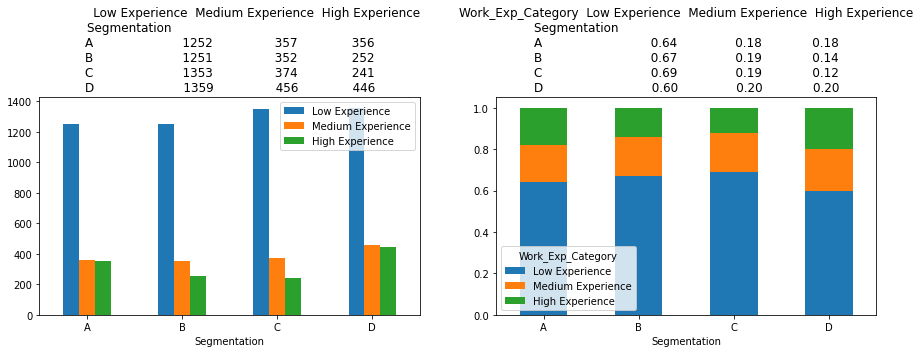

In [65]:
# Counting different category of work experience in each segment
ax1 = df_train.groupby(["Segmentation"])["Work_Exp_Category"].value_counts().unstack().round(3)

# Percentage of work experience in each segment
ax2 = df_train.pivot_table(columns='Work_Exp_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [66]:
# Dividing the people into 3 category of work experience 
df_test['Work_Exp_Category'] = pd.cut(df_train.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])


In [67]:
print('The count grouped by spending score\n',df_train.Spending_Score.value_counts())

The count grouped by spending score
 Low        4869
Average    1970
High       1210
Name: Spending_Score, dtype: int64


In [68]:
# Checking the count of missing values
df_train.Spending_Score.isnull().sum()

0

In [69]:
# Checking the count of missing values
df_test.Spending_Score.isnull().sum()

0

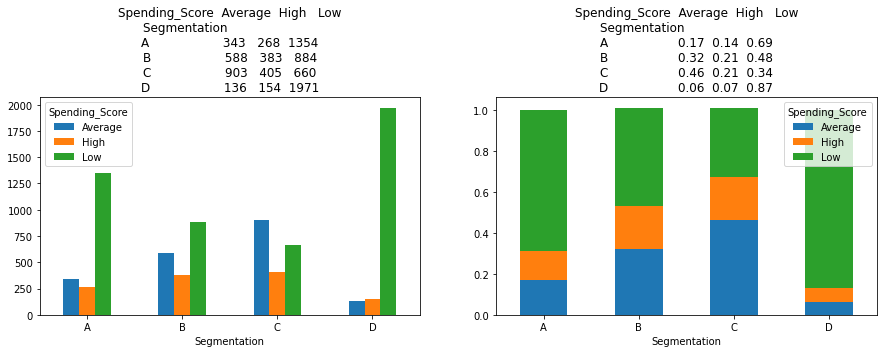

In [70]:
# Counting different category of spending score in each segment
ax1 = df_train.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack().round(3)

# Percentage of spending score in each segment
ax2 = df_train.pivot_table(columns='Spending_Score',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [71]:
df_train.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    7729.000000
mean        2.850175
std         1.531523
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [72]:
# Checking the count of missing values
df_train.Family_Size.isnull().sum()


320

In [73]:
# Filling the missing values w.r.t other attributes underlying pattern
df_train.loc[ (pd.isnull(df_train["Family_Size"])) & (df_train['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df_train.loc[ (pd.isnull(df_train["Family_Size"])) & (df_train['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df_train.loc[ (pd.isnull(df_train["Family_Size"])) & (df_train['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df_train['Family_Size'] = df_train['Family_Size'].fillna(method='pad')


In [74]:
# Checking the count of missing values
df_test.Family_Size.isnull().sum()


109

In [75]:
# Filling the missing values w.r.t other attributes underlying pattern
df_test.loc[ (pd.isnull(df_test["Family_Size"])) & (df_test['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df_test.loc[ (pd.isnull(df_test["Family_Size"])) & (df_test['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df_test.loc[ (pd.isnull(df_test["Family_Size"])) & (df_test['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df_test['Family_Size'] = df_test['Family_Size'].fillna(method='pad')


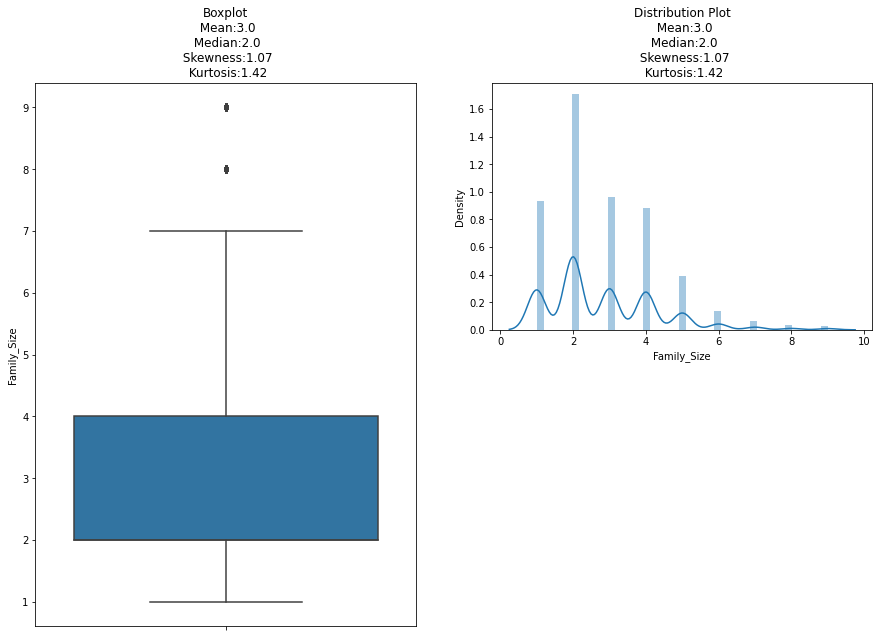

In [76]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df_train.Family_Size.skew(),2)
kurtosis = round(df_train.Family_Size.kurtosis(),2)
mean = round(np.mean(df_train.Family_Size),0)
median = np.median(df_train.Family_Size)

plt.subplot(1,2,1)
sns.boxplot(y=df_train.Family_Size)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df_train.Family_Size)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

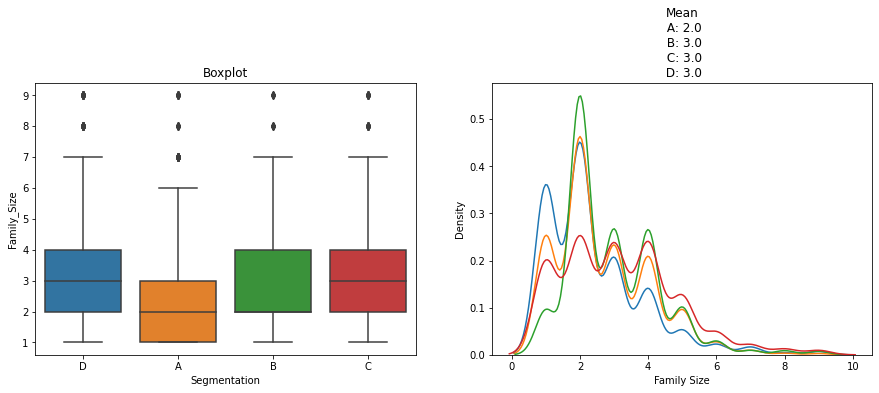

In [77]:
# Looking the distribution of column Family Size w.r.t to each segment
a = df_train[df_train.Segmentation =='A']["Family_Size"]
b = df_train[df_train.Segmentation =='B']["Family_Size"]
c = df_train[df_train.Segmentation =='C']["Family_Size"]
d = df_train[df_train.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df_train, x = "Segmentation", y="Family_Size")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [78]:
# Changing the data type
df_train['Family_Size'] = df_train['Family_Size'].astype(int)


In [79]:
df_train.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])


count    8049.000000
mean        2.820475
std         1.513836
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [80]:
# Divide family size into 3 category
df_train['Family_Size_Category'] = pd.cut(df_train.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])


In [81]:
# Changing the data type
df_test['Family_Size'] = df_test['Family_Size'].astype(int)


In [82]:
df_test.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    2621.000000
mean        2.804273
std         1.541115
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [83]:
# Divide family size into 3 category
df_test['Family_Size_Category'] = pd.cut(df_test.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])


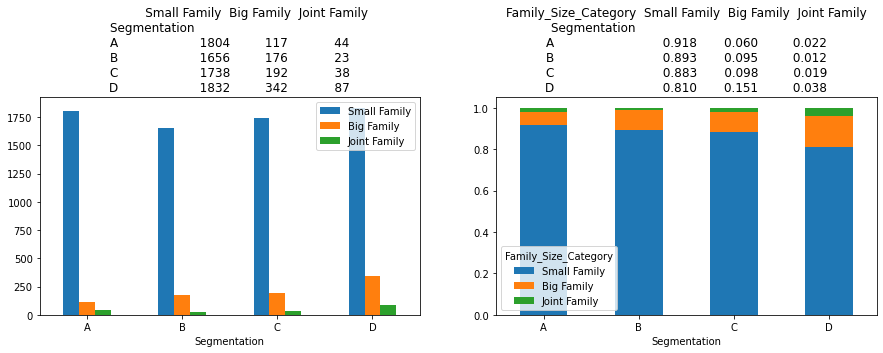

In [84]:
# Counting different category of family size in each segment
ax1 = df_train.groupby(["Segmentation"])["Family_Size_Category"].value_counts().unstack().round(3)

# Percentage of family size in each segment
ax2 = df_train.pivot_table(columns='Family_Size_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [85]:
print('Count of each category of segmentation\n',df_train.Segmentation.value_counts())

Count of each category of segmentation
 D    2261
C    1968
A    1965
B    1855
Name: Segmentation, dtype: int64


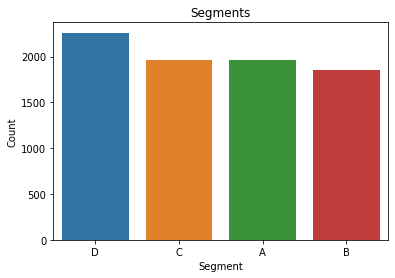

In [86]:
segments = df_train.loc[:,"Segmentation"].value_counts()
plt.xlabel("Segment")
plt.ylabel('Count')
sns.barplot(segments.index , segments.values).set_title('Segments')
plt.show()


In [87]:
df_train.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    8049 non-null   int64   
 1   Gender                8049 non-null   object  
 2   Ever_Married          8049 non-null   object  
 3   Age                   8049 non-null   int64   
 4   Graduated             8049 non-null   object  
 5   Profession            8049 non-null   object  
 6   Work_Experience       8049 non-null   float64 
 7   Spending_Score        8049 non-null   object  
 8   Family_Size           8049 non-null   int64   
 9   Var_1                 8049 non-null   object  
 10  Segmentation          8049 non-null   object  
 11  Age_Bin               8049 non-null   category
 12  Work_Exp_Category     8049 non-null   category
 13  Family_Size_Category  8049 non-null   category
dtypes: category(3), float64(1), int64(3), object(7)
memory u

In [88]:
# number of unique ids
df_train.ID.nunique()

8049

In [89]:
# number of unique ids in Test Set
df_test.ID.nunique()

2621

In [90]:
df_train.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin,Work_Exp_Category,Family_Size_Category
count,8049.000000,8049,8049,8049.000000,8049,8049,8049.000000,8049,8049.000000,8049,8049,8049,8049,8049
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4,4,3,3
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D,31-45,Low Experience,Small Family
freq,NaN,4409,4706,NaN,5023,2544,NaN,4869,NaN,5271,2261,2835,5215,7030
mean,463481.549012,NaN,NaN,43.458442,NaN,NaN,2.617965,NaN,2.820475,NaN,NaN,NaN,NaN,NaN
std,2595.221174,NaN,NaN,16.704328,NaN,NaN,3.394392,NaN,1.513836,NaN,NaN,NaN,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,461244.000000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,463476.000000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
75%,465746.000000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


In [91]:
df_train = df_train[['ID','Gender', 'Ever_Married', 'Age', 'Age_Bin', 'Graduated', 'Profession', 'Work_Experience', 'Work_Exp_Category',
         'Spending_Score', 'Family_Size', 'Family_Size_Category','Var_1', 'Segmentation']]
df_train.head(10)

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1.0,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1.0,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1.0,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0.0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0.0,Low Experience,High,6,Big Family,Cat_6,A
5,461319,Male,Yes,56,46-60,No,Artist,0.0,Low Experience,Average,2,Small Family,Cat_6,C
6,460156,Male,No,32,31-45,Yes,Healthcare,1.0,Low Experience,Low,3,Small Family,Cat_6,C
7,464347,Female,No,33,31-45,Yes,Healthcare,1.0,Low Experience,Low,3,Small Family,Cat_6,D
8,465015,Female,Yes,61,60+,Yes,Engineer,0.0,Low Experience,Low,3,Small Family,Cat_7,D
9,465176,Female,Yes,55,46-60,Yes,Artist,1.0,Low Experience,Average,4,Small Family,Cat_6,C


In [92]:
df1 = df_train.copy()
df1.head()

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1.0,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1.0,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1.0,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0.0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0.0,Low Experience,High,6,Big Family,Cat_6,A


In [93]:
# Separating dependent-independent variables
X = df1.drop('Segmentation',axis=1)
y = df1['Segmentation']

In [94]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df1_trainX, df1_testX, df1_trainY, df1_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)


In [95]:
# converting binary variables to numeric
df1_trainX['Gender'] = df1_trainX['Gender'].replace(('Male','Female'),(1,0))
df1_trainX['Ever_Married'] = df1_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_trainX['Graduated'] = df1_trainX['Graduated'].replace(('Yes','No'),(1,0))
df1_trainX['Spending_Score'] = df1_trainX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_trainX.Profession,prefix='Profession')
df1_trainX = pd.concat([df1_trainX,pf],axis=1)

vr = pd.get_dummies(df1_trainX.Var_1,prefix='Var_1')
df1_trainX = pd.concat([df1_trainX,vr],axis=1)

# scaling continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_trainX[['Age','Work_Experience','Family_Size']] = scaler.fit_transform(df1_trainX[['Age','Work_Experience','Family_Size']])

df1_trainX.drop(['ID','Age_Bin','Profession','Work_Exp_Category','Family_Size_Category','Var_1'], axis=1, inplace=True)


In [96]:
# converting binary variables to numeric
df1_testX['Gender'] = df1_testX['Gender'].replace(('Male','Female'),(1,0))
df1_testX['Ever_Married'] = df1_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_testX['Graduated'] = df1_testX['Graduated'].replace(('Yes','No'),(1,0))
df1_testX['Spending_Score'] = df1_testX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_testX.Profession,prefix='Profession')
df1_testX = pd.concat([df1_testX,pf],axis=1)

vr = pd.get_dummies(df1_testX.Var_1,prefix='Var_1')
df1_testX = pd.concat([df1_testX,vr],axis=1)

# scaling continuous variables
df1_testX[['Age','Work_Experience','Family_Size']] = scaler.transform(df1_testX[['Age','Work_Experience','Family_Size']])

df1_testX.drop(['ID','Age_Bin','Profession','Work_Exp_Category','Family_Size_Category','Var_1'], axis=1, inplace=True)


In [97]:
df1_trainX.shape, df1_trainY.shape, df1_testX.shape, df1_testY.shape


((5634, 23), (5634,), (2415, 23), (2415,))

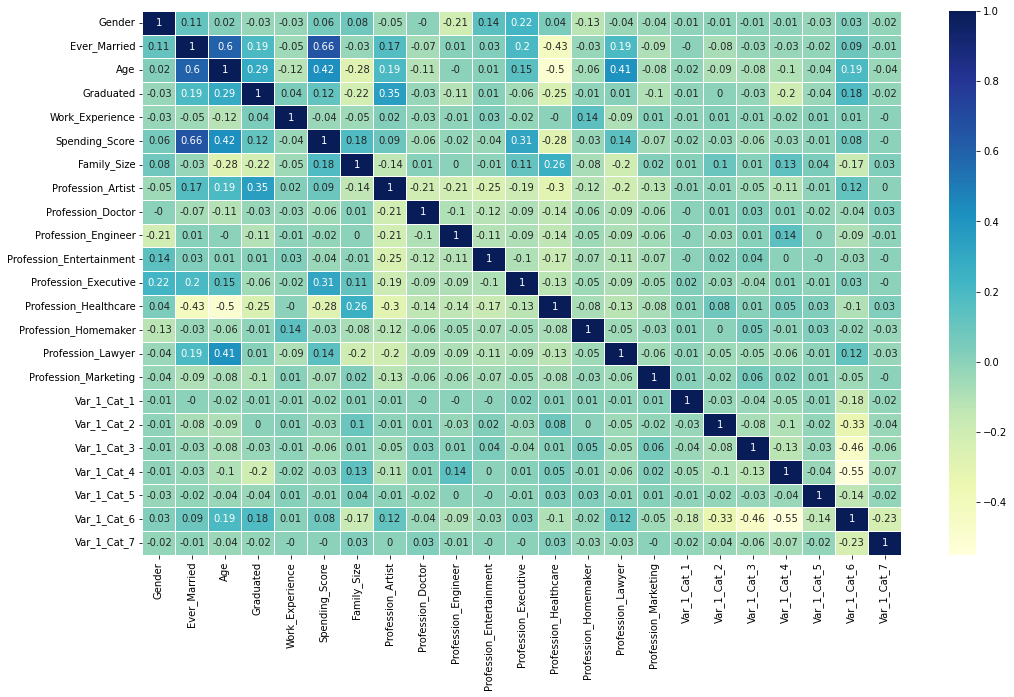

In [98]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df1_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

In [99]:
df2 = df_train.copy()
df2.head()

,ID,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,462809,Male,No,22,17-30,No,Healthcare,1.0,Low Experience,Low,4,Small Family,Cat_4,D
1,462643,Female,Yes,38,31-45,Yes,Engineer,1.0,Low Experience,Average,3,Small Family,Cat_4,A
2,466315,Female,Yes,67,60+,Yes,Engineer,1.0,Low Experience,Low,1,Small Family,Cat_6,B
3,461735,Male,Yes,67,60+,Yes,Lawyer,0.0,Low Experience,High,2,Small Family,Cat_6,B
4,462669,Female,Yes,40,31-45,Yes,Entertainment,0.0,Low Experience,High,6,Big Family,Cat_6,A


In [100]:
# Separating dependent-independent variables
X = df2.drop('Segmentation',axis=1)
y = df2['Segmentation']

In [101]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state = 42)
selector.fit(df1_trainX, df1_trainY)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))


0 3.19
1 3.65
2 35.44
3 3.7
4 15.94
5 5.78
6 12.7
7 3.57
8 0.89
9 0.86
10 1.11
11 0.65
12 4.45
13 0.58
14 0.63
15 0.76
16 0.53
17 0.84
18 1.08
19 1.21
20 0.33
21 1.45
22 0.65


In [102]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df2_trainX, df2_testX, df2_trainY, df2_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)


In [103]:
# Converting binary to numeric
df2_trainX['Gender'] = df2_trainX['Gender'].replace(('Male','Female'),(1,0))
df2_trainX['Ever_Married'] = df2_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df2_trainX['Graduated'] = df2_trainX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df2_trainX.Age_Bin,prefix='Age_Bin')
df2_trainX = pd.concat([df2_trainX,ab],axis=1)

pf = pd.get_dummies(df2_trainX.Profession,prefix='Profession')
df2_trainX = pd.concat([df2_trainX,pf],axis=1)

we = pd.get_dummies(df2_trainX.Work_Exp_Category,prefix='WorkExp')
df2_trainX = pd.concat([df2_trainX,we],axis=1)

sc = pd.get_dummies(df2_trainX.Spending_Score,prefix='Spending')
df2_trainX = pd.concat([df2_trainX,sc],axis=1)


fs = pd.get_dummies(df2_trainX.Family_Size_Category,prefix='FamilySize')
df2_trainX = pd.concat([df2_trainX,fs],axis=1)

vr = pd.get_dummies(df2_trainX.Var_1,prefix='Var_1')
df2_trainX = pd.concat([df2_trainX,vr],axis=1)

df2_trainX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)


In [104]:
# Converting binary to numeric
df2_testX['Gender'] = df2_testX['Gender'].replace(('Male','Female'),(1,0))
df2_testX['Ever_Married'] = df2_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df2_testX['Graduated'] = df2_testX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df2_testX.Age_Bin,prefix='Age_Bin')
df2_testX = pd.concat([df2_testX,ab],axis=1)

pf = pd.get_dummies(df2_testX.Profession,prefix='Profession')
df2_testX = pd.concat([df2_testX,pf],axis=1)

we = pd.get_dummies(df2_testX.Work_Exp_Category,prefix='WorkExp')
df2_testX = pd.concat([df2_testX,we],axis=1)

sc = pd.get_dummies(df2_testX.Spending_Score,prefix='Spending')
df2_testX = pd.concat([df2_testX,sc],axis=1)


fs = pd.get_dummies(df2_testX.Family_Size_Category,prefix='FamilySize')
df2_testX = pd.concat([df2_testX,fs],axis=1)

vr = pd.get_dummies(df2_testX.Var_1,prefix='Var_1')
df2_testX = pd.concat([df2_testX,vr],axis=1)

df2_testX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)



In [105]:
df2_trainX.shape, df2_trainY.shape, df2_testX.shape, df2_testY.shape


((5634, 32), (5634,), (2415, 32), (2415,))

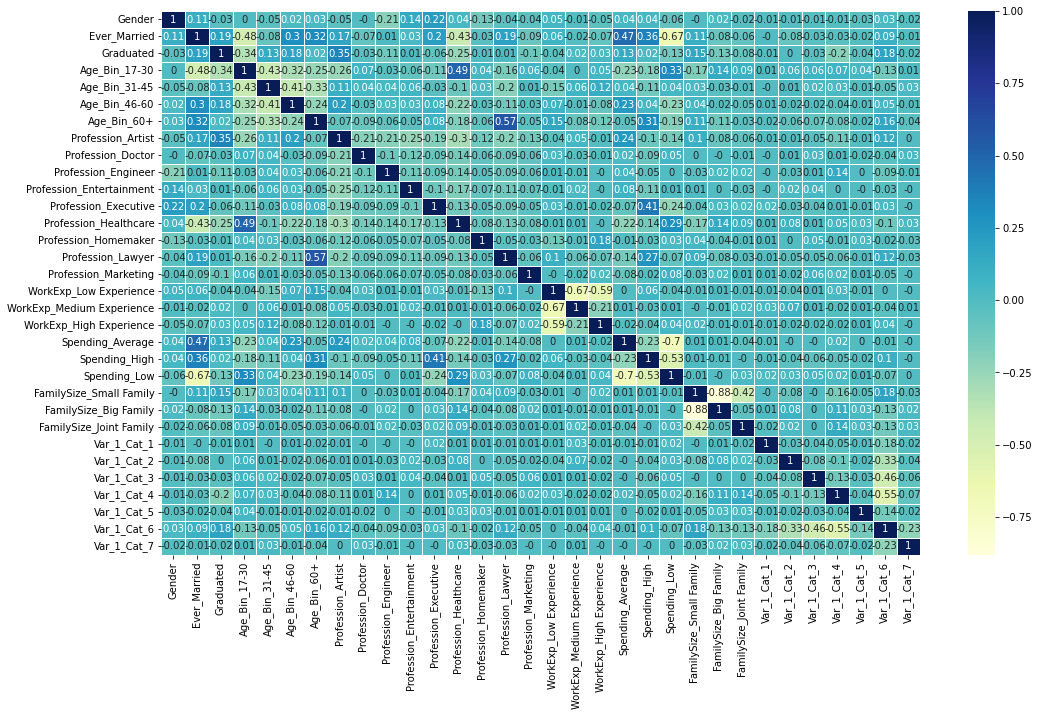

In [106]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df2_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

#### IT19104218

In [107]:
train_dt1_x = df1_trainX.copy()
train_dt1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
train_dt1_y = df1_trainY.copy()
train_dt1_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [109]:
# importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt1 = DecisionTreeClassifier(random_state=10,criterion='gini')

#fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt1.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt1.score(train_dt1_x, train_dt1_y))

# predict the target on the train dataset
yhat1 = model_dt1.predict(train_dt1_x)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_dt1_y.values, yhat1, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_dt1_y.values, yhat1))

Depth of the Decision Tree:  26
Accuracy on training:  0.9623713170039049
-------The confusion matrix for this model is-------
[[1363    7    5    0]
 [  51 1238    9    0]
 [  26   56 1293    3]
 [  21   17   17 1528]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.93      0.99      0.96      1375
           B       0.94      0.95      0.95      1298
           C       0.98      0.94      0.96      1378
           D       1.00      0.97      0.98      1583

    accuracy                           0.96      5634
   macro avg       0.96      0.96      0.96      5634
weighted avg       0.96      0.96      0.96      5634



In [110]:
X1 = train_dt1_x.copy()
y1 = pd.DataFrame({'Seg':train_dt1_y})
y1['Seg'] = y1['Seg'].replace(('A','B','C','D'),(1,2,3,4))

In [111]:
# Implementing grid search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7]
    }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model_dt1, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

gridsearch.fit(X1, y1)

print(gridsearch.best_params_)

{'max_depth': 25, 'max_features': 0.7}


In [112]:
# Implementing random search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7,0.9]
    }

from sklearn.model_selection import RandomizedSearchCV

randomsearch = RandomizedSearchCV(estimator=model_dt1, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(X1, y1)

print(randomsearch.best_params_)

{'max_features': 0.7, 'max_depth': 26}


In [113]:
# final model
model_dt1 = DecisionTreeClassifier(max_depth=26, max_features=0.9 ,random_state=10)

# fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# Training score
print(model_dt1.score(train_dt1_x, train_dt1_y).round(4))

0.9624


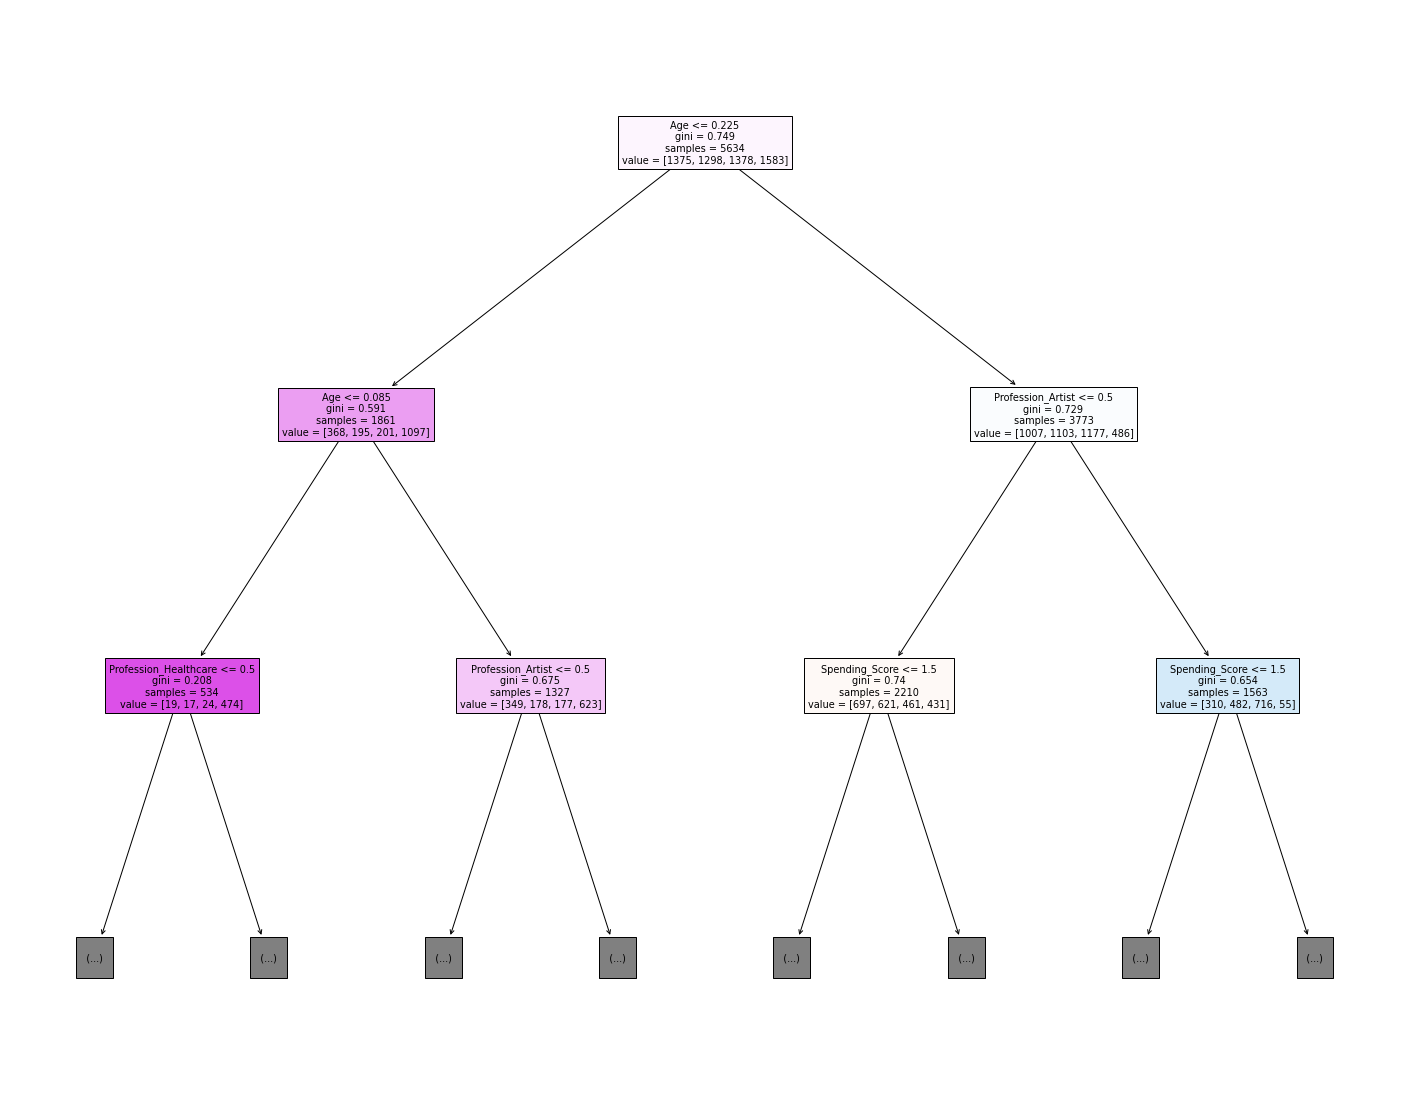

In [114]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt1, feature_names=train_dt1_x.columns, max_depth=2, filled=True)

In [115]:
#Predicting on test set
test_dt1_x = df1_testX.copy()
test_dt1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [116]:
test_dt1_y = df1_testY.copy()
test_dt1_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [117]:
y_dt1 = model_dt1.predict(test_dt1_x)
y_dt1

array(['B', 'D', 'B', ..., 'B', 'C', 'C'], dtype=object)

In [118]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_dt1_y.values, y_dt1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_dt1_y.values, y_dt1))

-------The confusion matrix for test data is-------

[[203 144 102 141]
 [133 186 171  67]
 [102 168 258  62]
 [131  81  74 392]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.36      0.34      0.35       590
           B       0.32      0.33      0.33       557
           C       0.43      0.44      0.43       590
           D       0.59      0.58      0.59       678

    accuracy                           0.43      2415
   macro avg       0.42      0.42      0.42      2415
weighted avg       0.43      0.43      0.43      2415



In [119]:
pd.Series(y_dt1).value_counts()

D    662
C    605
B    579
A    569
dtype: int64

In [120]:
#Building the model with second type of dataframe(df_type2)
train_dt2_x = df2_trainX.copy()
train_dt2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [121]:
train_dt2_y = df2_trainY.copy()
train_dt2_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [122]:
# importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt2 = DecisionTreeClassifier(random_state=10,criterion='gini')

#fitting the model
model_dt2.fit(train_dt2_x, train_dt2_y)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt2.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt2.score(train_dt2_x, train_dt2_y))

# predict the target on the train dataset
yhat2 = model_dt2.predict(train_dt2_x)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(train_dt2_y.values, yhat2, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm2)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_dt2_y.values, yhat2))

Depth of the Decision Tree:  23
Accuracy on training:  0.7190273340433084
-------The confusion matrix for this model is-------
[[1073  142   75   85]
 [ 240  795  200   63]
 [ 149  227  932   70]
 [ 203   80   49 1251]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.64      0.78      0.71      1375
           B       0.64      0.61      0.63      1298
           C       0.74      0.68      0.71      1378
           D       0.85      0.79      0.82      1583

    accuracy                           0.72      5634
   macro avg       0.72      0.71      0.71      5634
weighted avg       0.73      0.72      0.72      5634



In [123]:
X2 = train_dt2_x.copy()
y2 = pd.DataFrame({'Seg':train_dt2_y})
y2['Seg'] = y2['Seg'].replace(('A','B','C','D'),(1,2,3,4))

In [124]:
# Implement the grid search
parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7]
    }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model_dt2, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

gridsearch.fit(X2, y2)

print(gridsearch.best_params_)

{'max_depth': 24, 'max_features': 0.5}


In [125]:
# Implement random search
parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7,0.9]
    }

from sklearn.model_selection import RandomizedSearchCV

randomsearch = RandomizedSearchCV(estimator=model_dt2, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(X2, y2)

print(randomsearch.best_params_)

{'max_features': 0.5, 'max_depth': 24}


In [126]:
# final model
model_dt2 = DecisionTreeClassifier(max_depth=25, max_features=0.7, random_state=10)

#fitting the model
model_dt2.fit(train_dt2_x, train_dt2_y)

#Training score
print(model_dt2.score(train_dt2_x, train_dt2_y).round(4))

0.719


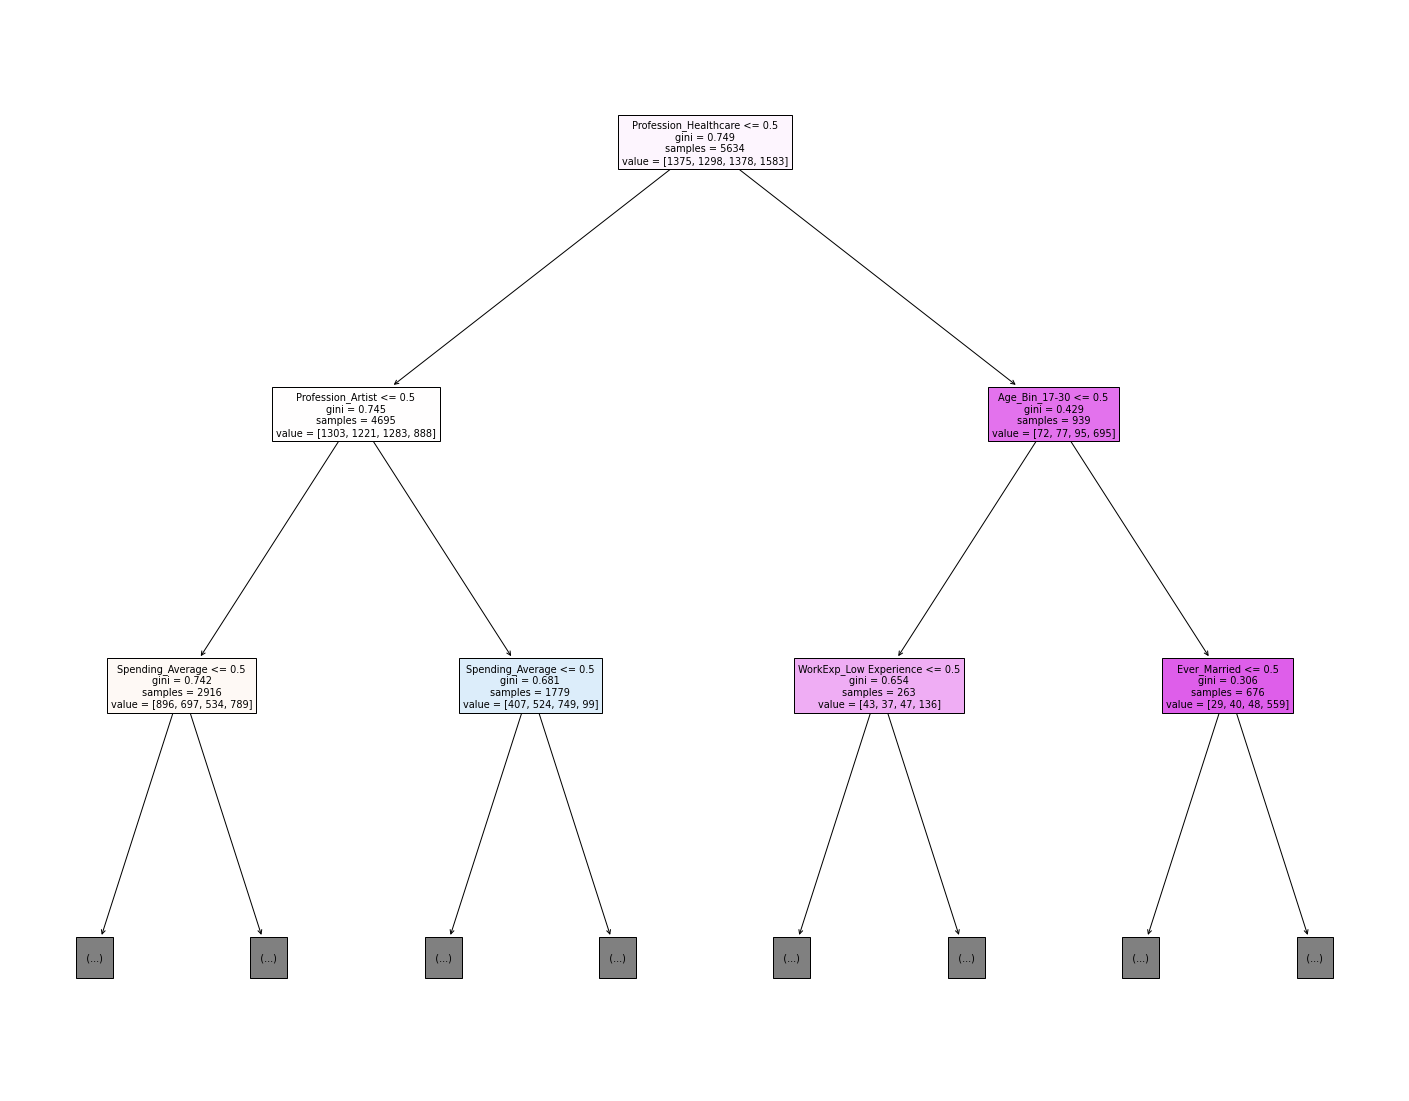

In [127]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt2, feature_names=train_dt2_x.columns, max_depth=2, filled=True)

In [128]:
# Predict the test set
test_dt2_x = df2_testX.copy()
test_dt2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [129]:
test_dt2_y = df2_testY.copy()
test_dt2_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [130]:
y_dt2 = model_dt2.predict(test_dt2_x)
y_dt2

array(['B', 'D', 'B', ..., 'B', 'C', 'C'], dtype=object)

In [131]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------')
print(confusion_matrix(test_dt2_y.values, y_dt2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------')
print(classification_report(test_dt2_y.values, y_dt2))

-------The confusion matrix for test data is-------
[[248 136  82 124]
 [138 201 158  60]
 [ 90 144 282  74]
 [168  72  43 395]]


-------Printing the report of test data-------
              precision    recall  f1-score   support

           A       0.39      0.42      0.40       590
           B       0.36      0.36      0.36       557
           C       0.50      0.48      0.49       590
           D       0.60      0.58      0.59       678

    accuracy                           0.47      2415
   macro avg       0.46      0.46      0.46      2415
weighted avg       0.47      0.47      0.47      2415



In [132]:
pd.Series(y_dt2).value_counts()

D    653
A    644
C    565
B    553
dtype: int64

In [133]:
# Evaluate the model
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_dt1_y.values, yhat1))
print('\nTest data')
print(classification_report(test_dt1_y.values, y_dt1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.93      0.99      0.96      1375
           B       0.94      0.95      0.95      1298
           C       0.98      0.94      0.96      1378
           D       1.00      0.97      0.98      1583

    accuracy                           0.96      5634
   macro avg       0.96      0.96      0.96      5634
weighted avg       0.96      0.96      0.96      5634


Test data
              precision    recall  f1-score   support

           A       0.36      0.34      0.35       590
           B       0.32      0.33      0.33       557
           C       0.43      0.44      0.43       590
           D       0.59      0.58      0.59       678

    accuracy                           0.43      2415
   macro avg       0.42      0.42      0.42      2415
weighted avg       0.43      0.43      0.43      2415



In [134]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_dt2_y.values, yhat2))
print('\nTest data')
print(classification_report(test_dt2_y.values, y_dt2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.64      0.78      0.71      1375
           B       0.64      0.61      0.63      1298
           C       0.74      0.68      0.71      1378
           D       0.85      0.79      0.82      1583

    accuracy                           0.72      5634
   macro avg       0.72      0.71      0.71      5634
weighted avg       0.73      0.72      0.72      5634


Test data
              precision    recall  f1-score   support

           A       0.39      0.42      0.40       590
           B       0.36      0.36      0.36       557
           C       0.50      0.48      0.49       590
           D       0.60      0.58      0.59       678

    accuracy                           0.47      2415
   macro avg       0.46      0.46      0.46      2415
weighted avg       0.47      0.47      0.47      2415



In [135]:
# Build the random forest model
train_rf1_x = df1_trainX.copy()
train_rf1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [136]:
train_rf1_y = df1_trainY.copy()
train_rf1_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [137]:
# In[132]:


# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc1 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc1 = rfc1.fit(train_rf1_x, train_rf1_y)

# Predicting the classes
yhat3 = rfc1.predict(train_rf1_x)

# view the feature scores
feature_scores = pd.Series(rfc1.feature_importances_, index=train_rf1_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_rf1_y.values, yhat3, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf1_y.values, yhat3))

The importance of features ranked from high to low:
 Age                         0.360513
Work_Experience             0.153452
Family_Size                 0.109489
Spending_Score              0.058937
Profession_Healthcare       0.039107
Graduated                   0.037542
Profession_Artist           0.035455
Gender                      0.034647
Ever_Married                0.023368
Var_1_Cat_6                 0.020353
Var_1_Cat_4                 0.016018
Profession_Entertainment    0.014560
Var_1_Cat_3                 0.013993
Profession_Doctor           0.012127
Profession_Engineer         0.011768
Var_1_Cat_2                 0.010168
Profession_Marketing        0.008849
Profession_Executive        0.008074
Profession_Lawyer           0.008052
Profession_Homemaker        0.007736
Var_1_Cat_7                 0.007290
Var_1_Cat_1                 0.005155
Var_1_Cat_5                 0.003346
dtype: float64


-------The confusion matrix for this model is-------
[[1316   34   16    9]
 [ 

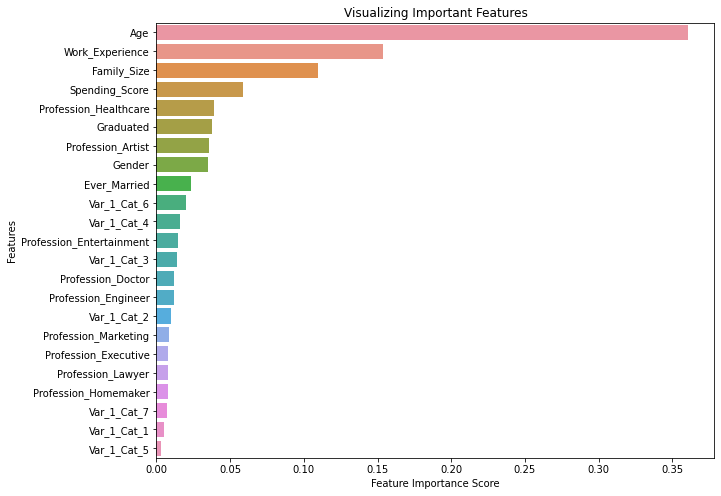

In [138]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [139]:
#Predicting on test set
test_rf1_x = df1_testX.copy()
test_rf1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [140]:
test_rf1_y = df1_testY.copy()
test_rf1_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [141]:
y_rf1 = rfc1.predict(test_rf1_x)
y_rf1

array(['B', 'D', 'B', ..., 'D', 'C', 'C'], dtype=object)

In [142]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf1_y.values, y_rf1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf1_y.values, y_rf1))

-------The confusion matrix for test data is-------

[[226 131  97 136]
 [133 178 172  74]
 [ 80 158 275  77]
 [134  53  49 442]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.39      0.38      0.39       590
           B       0.34      0.32      0.33       557
           C       0.46      0.47      0.46       590
           D       0.61      0.65      0.63       678

    accuracy                           0.46      2415
   macro avg       0.45      0.46      0.45      2415
weighted avg       0.46      0.46      0.46      2415



In [143]:
pd.Series(y_rf1).value_counts()

D    729
C    593
A    573
B    520
dtype: int64

In [144]:
#Building the model with second type of dataframe(df_type2)
train_rf2_x = df2_trainX.copy()
train_rf2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [145]:
train_rf2_y = df2_trainY.copy()
train_rf2_y.head()

3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [146]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc2 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc2 = rfc2.fit(train_rf2_x, train_rf2_y)

# Predicting the classes
yhat4 = rfc2.predict(train_rf2_x)

# view the feature scores
feature_scores = pd.Series(rfc2.feature_importances_, index=train_rf2_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(train_rf2_y.values, yhat4, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm4)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf2_y.values, yhat4))

The importance of features ranked from high to low:
 Gender                       0.078155
Graduated                    0.075827
Age_Bin_17-30                0.070427
Profession_Artist            0.059522
Ever_Married                 0.058844
Spending_Low                 0.046353
Profession_Healthcare        0.044488
WorkExp_Low Experience       0.040253
Var_1_Cat_6                  0.037735
WorkExp_Medium Experience    0.031896
Var_1_Cat_4                  0.031552
Profession_Entertainment     0.030885
Spending_Average             0.030207
WorkExp_High Experience      0.030063
Var_1_Cat_3                  0.027310
Age_Bin_31-45                0.027142
Profession_Doctor            0.025921
Age_Bin_46-60                0.024763
Profession_Engineer          0.024556
FamilySize_Small Family      0.021999
Var_1_Cat_2                  0.020042
Spending_High                0.019804
FamilySize_Big Family        0.019021
Age_Bin_60+                  0.018391
Profession_Executive         0.0178

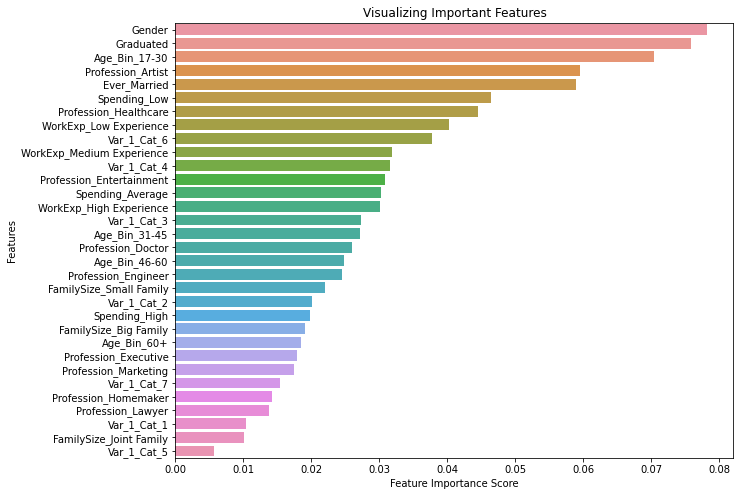

In [147]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [148]:
#Predicting on test set
test_rf2_x = df2_testX.copy()
test_rf2_x.head()

,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [149]:
test_rf2_y = df2_testY.copy()
test_rf2_y.head()

5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [150]:
y_rf2 = rfc2.predict(test_rf2_x)
y_rf2

array(['B', 'D', 'B', ..., 'B', 'D', 'C'], dtype=object)

In [151]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf2_y.values, y_rf2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf2_y.values, y_rf2))

-------The confusion matrix for test data is-------

[[218 129  85 158]
 [124 184 169  80]
 [ 72 145 284  89]
 [137  58  35 448]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.40      0.37      0.38       590
           B       0.36      0.33      0.34       557
           C       0.50      0.48      0.49       590
           D       0.58      0.66      0.62       678

    accuracy                           0.47      2415
   macro avg       0.46      0.46      0.46      2415
weighted avg       0.46      0.47      0.46      2415



In [152]:
pd.Series(y_rf2).value_counts()

D    775
C    573
A    551
B    516
dtype: int64

In [153]:
#MODEL EVALUATION
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf1_y.values, yhat3))
print('\nTest data')
print(classification_report(test_rf1_y.values, y_rf1))


************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.95      0.96      0.96      1375
           B       0.94      0.94      0.94      1298
           C       0.95      0.96      0.95      1378
           D       0.98      0.97      0.98      1583

    accuracy                           0.96      5634
   macro avg       0.96      0.96      0.96      5634
weighted avg       0.96      0.96      0.96      5634


Test data
              precision    recall  f1-score   support

           A       0.39      0.38      0.39       590
           B       0.34      0.32      0.33       557
           C       0.46      0.47      0.46       590
           D       0.61      0.65      0.63       678

    accuracy                           0.46      2415
   macro avg       0.45      0.46      0.45      2415
weighted avg       0.46      0.46      0.46      2415



In [154]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf2_y.values, yhat4))
print('\nTest data')
print(classification_report(test_rf2_y.values, y_rf2))

************************  MODEL-2 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           A       0.69      0.69      0.69      1375
           B       0.63      0.61      0.62      1298
           C       0.72      0.70      0.71      1378
           D       0.81      0.84      0.82      1583

    accuracy                           0.72      5634
   macro avg       0.71      0.71      0.71      5634
weighted avg       0.72      0.72      0.72      5634


Test data
              precision    recall  f1-score   support

           A       0.40      0.37      0.38       590
           B       0.36      0.33      0.34       557
           C       0.50      0.48      0.49       590
           D       0.58      0.66      0.62       678

    accuracy                           0.47      2415
   macro avg       0.46      0.46      0.46      2415
weighted avg       0.46      0.47      0.46      2415



In [155]:
#MODEL BUILDING
#Naive bayes
train_nb1_x = df1_trainX.copy()
train_nb1_x.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,0.281690,1,0.357143,1,0.75,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6351,1,1,0.915493,1,0.500000,1,0.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1962,0,0,0.211268,1,0.500000,1,0.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,0.112676,1,0.928571,1,0.25,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1256,1,1,0.436620,1,0.000000,1,0.25,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [163]:
# In[151]:


train_nb1_y = df1_trainY.copy()
train_nb1_y.head()


3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [168]:
# In[152]:


#train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb1 = GaussianNB()

# Train model
model_nb1 = gnb1.fit(train_nb1_x, train_nb1_y)

# Predicting the classes
yhat3 = gnb1.predict(train_nb1_x)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_nb1_y.values, yhat3, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_nb1_y.values, yhat3))




-------The confusion matrix for this model is-------
[[568 126 470 211]
 [315 171 658 154]
 [179  88 953 158]
 [352  70 168 993]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.40      0.41      0.41      1375
           B       0.38      0.13      0.20      1298
           C       0.42      0.69      0.53      1378
           D       0.66      0.63      0.64      1583

    accuracy                           0.48      5634
   macro avg       0.46      0.47      0.44      5634
weighted avg       0.47      0.48      0.45      5634



In [169]:
# In[153]:


#Predicting on test set
test_nb1_x = df1_testX.copy()
test_nb1_x.head()



,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,0.478873,1,0.071429,2,0.500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7375,1,0,0.042254,0,0.071429,1,0.500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6807,1,0,0.183099,0,0.000000,1,0.625,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,1,1,0.605634,1,0.000000,1,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4390,1,1,0.830986,1,0.000000,1,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [170]:
# In[154]:


test_nb1_y = df1_testY.copy()
test_nb1_y.head()


5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [171]:
# In[155]:


y_nb1 = gnb1.predict(test_nb1_x)
y_nb1


array(['A', 'D', 'D', ..., 'A', 'D', 'C'], dtype='<U1')

In [172]:
# In[156]:


from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_nb1_y.values, y_nb1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_nb1_y.values, y_nb1))


-------The confusion matrix for test data is-------

[[212  70 209  99]
 [129  81 297  50]
 [ 63  41 395  91]
 [145  31  67 435]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.39      0.36      0.37       590
           B       0.36      0.15      0.21       557
           C       0.41      0.67      0.51       590
           D       0.64      0.64      0.64       678

    accuracy                           0.47      2415
   macro avg       0.45      0.45      0.43      2415
weighted avg       0.46      0.47      0.44      2415



In [173]:
# In[157]:


pd.Series(y_nb1).value_counts()



C    968
D    675
A    549
B    223
dtype: int64

In [174]:
# In[158]:


#Building the model with second type of dataframe(df_type2)
train_nb2_x = df2_trainX.copy()
train_nb2_x.head()



,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
3854,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6351,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1962,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2415,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1256,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [175]:
# In[159]:


train_nb2_y = df2_trainY.copy()
train_nb2_y.head()



3854    A
6351    D
1962    C
2415    D
1256    B
Name: Segmentation, dtype: object

In [176]:
# In[160]:


# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb2 = GaussianNB()

# Train model
model_nb2 = gnb2.fit(train_nb2_x, train_nb2_y)

# Predicting the classes
yhat4 = gnb2.predict(train_nb2_x)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(train_nb2_y.values, yhat4, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm4)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_nb2_y.values, yhat4))



-------The confusion matrix for this model is-------
[[ 570  159  393  253]
 [ 282  233  626  157]
 [ 137  133  934  174]
 [ 301   84  129 1069]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           A       0.44      0.41      0.43      1375
           B       0.38      0.18      0.24      1298
           C       0.45      0.68      0.54      1378
           D       0.65      0.68      0.66      1583

    accuracy                           0.50      5634
   macro avg       0.48      0.49      0.47      5634
weighted avg       0.49      0.50      0.48      5634



In [177]:
# In[161]:


#PREDICTING ON TEST SET
test_nb2_x = df2_testX.copy()
test_nb2_x.head()



,Gender,Ever_Married,Graduated,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,...,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
5579,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7375,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6807,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4390,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [178]:
# In[162]:


test_nb2_y = df2_testY.copy()
test_nb2_y.head()


5579    B
7375    D
6807    D
4359    B
4390    A
Name: Segmentation, dtype: object

In [179]:
# In[163]:


y_nb2 = gnb2.predict(test_nb2_x)
y_nb2


array(['B', 'D', 'D', ..., 'B', 'D', 'C'], dtype='<U1')

In [180]:
# In[164]:


from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_nb2_y.values, y_nb2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_nb2_y.values, y_nb2))



-------The confusion matrix for test data is-------

[[213  82 183 112]
 [112 113 276  56]
 [ 56  52 388  94]
 [121  33  61 463]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           A       0.42      0.36      0.39       590
           B       0.40      0.20      0.27       557
           C       0.43      0.66      0.52       590
           D       0.64      0.68      0.66       678

    accuracy                           0.49      2415
   macro avg       0.47      0.48      0.46      2415
weighted avg       0.48      0.49      0.47      2415



In [181]:
# In[166]:


pd.Series(y_nb2).value_counts()

C    908
D    725
A    502
B    280
dtype: int64